In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats

In [ ]:
df_admission = pd.read_csv('/content/drive/MyDrive/Comprehensive Analysis of Electronic Health Record Data using Python/ADMISSIONS.csv')
df_diagnose = pd.read_csv('/content/drive/MyDrive/Comprehensive Analysis of Electronic Health Record Data using Python/DIAGNOSES_ICD.csv')
df_patient = pd.read_csv('/content/drive/MyDrive/Comprehensive Analysis of Electronic Health Record Data using Python/PATIENTS.csv')
df_icd = pd.read_csv('/content/drive/MyDrive/Comprehensive Analysis of Electronic Health Record Data using Python/D_ICD_DIAGNOSES.csv')

In [ ]:
df_admission.shape

(129, 17)

In [ ]:
df_diagnose.shape

(1761, 4)

In [ ]:
df_patient.shape

(100, 4)

In [ ]:
df_icd.shape

(14567, 4)

In [ ]:
df_admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   row_id                129 non-null    int64 
 1   subject_id            129 non-null    int64 
 2   hadm_id               129 non-null    int64 
 3   admittime             129 non-null    object
 4   dischtime             129 non-null    object
 5   deathtime             40 non-null     object
 6   admission_type        129 non-null    object
 7   admission_location    129 non-null    object
 8   insurance             129 non-null    object
 9   language              81 non-null     object
 10  religion              128 non-null    object
 11  marital_status        113 non-null    object
 12  ethnicity             129 non-null    object
 13  edregtime             92 non-null     object
 14  edouttime             92 non-null     object
 15  diagnosis             129 non-null    ob

In [ ]:
#converting date time columns from dtype 'object' to 'datetime'.

date_columns = ['admittime', 'dischtime','deathtime','edregtime','edouttime']

# Convert columns to datetime dtype in place
df_admission[date_columns] = df_admission[date_columns].apply(pd.to_datetime)

df_admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   row_id                129 non-null    int64         
 1   subject_id            129 non-null    int64         
 2   hadm_id               129 non-null    int64         
 3   admittime             129 non-null    datetime64[ns]
 4   dischtime             129 non-null    datetime64[ns]
 5   deathtime             40 non-null     datetime64[ns]
 6   admission_type        129 non-null    object        
 7   admission_location    129 non-null    object        
 8   insurance             129 non-null    object        
 9   language              81 non-null     object        
 10  religion              128 non-null    object        
 11  marital_status        113 non-null    object        
 12  ethnicity             129 non-null    object        
 13  edregtime           

In [ ]:
df_diagnose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   row_id      1761 non-null   int64 
 1   subject_id  1761 non-null   int64 
 2   hadm_id     1761 non-null   int64 
 3   icd9_code   1761 non-null   object
dtypes: int64(3), object(1)
memory usage: 55.2+ KB


In [ ]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   row_id      100 non-null    int64 
 1   subject_id  100 non-null    int64 
 2   gender      100 non-null    object
 3   dob         100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [ ]:
#converting date time column from dtype 'object' to 'datetime'.
df_patient['dob'] = df_patient['dob'].apply(pd.to_datetime)
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   row_id      100 non-null    int64         
 1   subject_id  100 non-null    int64         
 2   gender      100 non-null    object        
 3   dob         100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.2+ KB


In [ ]:
df_icd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14567 entries, 0 to 14566
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       14567 non-null  int64 
 1   icd9_code    14567 non-null  object
 2   short_title  14567 non-null  object
 3   long_title   14567 non-null  object
dtypes: int64(1), object(3)
memory usage: 455.3+ KB


In [ ]:
df_diagnose.head(10)

,row_id,subject_id,hadm_id,icd9_code
0,112344,10006,142345,99591
1,112345,10006,142345,99662
2,112346,10006,142345,5672
3,112347,10006,142345,40391
4,112348,10006,142345,42731
5,112349,10006,142345,4280
6,112350,10006,142345,4241
7,112351,10006,142345,4240
8,112352,10006,142345,2874
9,112353,10006,142345,3819


In [ ]:
df_patient.head(10)

,row_id,subject_id,gender,dob
0,9467,10006,F,2094-03-05 0:00:00
1,9472,10011,F,2090-06-05 0:00:00
2,9474,10013,F,2038-09-03 0:00:00
3,9478,10017,F,2075-09-21 0:00:00
4,9479,10019,M,2114-06-20 0:00:00
5,9486,10026,F,1895-05-17 0:00:00
6,9487,10027,F,2108-01-15 0:00:00
7,9489,10029,M,2061-04-10 0:00:00
8,9491,10032,M,2050-03-29 0:00:00
9,9492,10033,F,2051-04-21 0:00:00


In [ ]:
df_icd.head(10)

,row_id,icd9_code,short_title,long_title
0,1,01716,Erythem nod tb-oth test,Erythema nodosum with hypersensitivity reactio...
1,2,01720,TB periph lymph-unspec,"Tuberculosis of peripheral lymph nodes, unspec..."
2,3,01721,TB periph lymph-no exam,"Tuberculosis of peripheral lymph nodes, bacter..."
3,4,01722,TB periph lymph-exam unk,"Tuberculosis of peripheral lymph nodes, bacter..."
4,5,01723,TB periph lymph-micro dx,"Tuberculosis of peripheral lymph nodes, tuberc..."
5,6,01724,TB periph lymph-cult dx,"Tuberculosis of peripheral lymph nodes, tuberc..."
6,7,01725,TB periph lymph-histo dx,"Tuberculosis of peripheral lymph nodes, tuberc..."
7,8,01726,TB periph lymph-oth test,"Tuberculosis of peripheral lymph nodes, tuberc..."
8,9,01730,TB of eye-unspec,"Tuberculosis of eye, unspecified"
9,10,01731,TB of eye-no exam,"Tuberculosis of eye, bacteriological or histol..."


In [ ]:
df_admission.head(10)

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaT,NaT,HEPATITIS B,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaT,NaT,SEPSIS,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaT,NaT,ALCOHOLIC HEPATITIS,1
5,12277,10026,103770,2195-05-17 07:39:00,2195-05-24 11:45:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,OTHER,NaN,WHITE,2195-05-17 01:49:00,2195-05-17 08:29:00,STROKE/TIA,0
6,12278,10027,199395,2190-07-13 07:15:00,2190-07-25 14:00:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaT,NaT,MITRAL REGURGITATION;CORONARY ARTERY DISEASE\C...,0
7,12280,10029,132349,2139-09-22 10:58:00,2139-10-02 14:29:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,PROTESTANT QUAKER,DIVORCED,WHITE,2139-09-22 06:03:00,2139-09-22 11:50:00,SYNCOPE;TELEMETRY,0
8,12282,10032,140372,2138-04-02 19:52:00,2138-04-15 14:35:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,CATHOLIC,WIDOWED,WHITE,2138-04-02 14:56:00,2138-04-02 20:40:00,RIGHT HUMEROUS FRACTURE,0
9,12283,10033,157235,2132-12-05 02:46:00,2132-12-08 15:15:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,POLI,CATHOLIC,MARRIED,WHITE,2132-12-04 20:11:00,2132-12-05 04:05:00,RENAL FAILIURE-SYNCOPE-HYPERKALEMIA,0


# **Finding null values**

In [ ]:
null_admission=df_admission.isnull().sum()
null_diagnose=df_diagnose.isnull().sum()
null_patient=df_patient.isnull().sum()
null_icd=df_icd.isnull().sum()

In [ ]:
null_admission

row_id                   0
subject_id               0
hadm_id                  0
admittime                0
dischtime                0
deathtime               89
admission_type           0
admission_location       0
insurance                0
language                48
religion                 1
marital_status          16
ethnicity                0
edregtime               37
edouttime               37
diagnosis                0
hospital_expire_flag     0
dtype: int64

In [ ]:
null_diagnose

0

In [ ]:
null_patient

0

In [ ]:
null_icd

0

# **Analyze Gender Distribution, Age Groups, Ethnicity, and Marital Status.**

In [ ]:
df_patient['gender'].value_counts()

gender
F    55
M    45
Name: count, dtype: int64

In [ ]:
df_admission['ethnicity'].value_counts()

ethnicity
WHITE                                                       86
HISPANIC/LATINO - PUERTO RICAN                              15
UNKNOWN/NOT SPECIFIED                                       11
BLACK/AFRICAN AMERICAN                                       7
OTHER                                                        3
ASIAN                                                        2
HISPANIC OR LATINO                                           2
AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE     2
UNABLE TO OBTAIN                                             1
Name: count, dtype: int64

In [ ]:
df_admission['marital_status'].value_counts()

marital_status
MARRIED              60
SINGLE               26
WIDOWED              15
DIVORCED              6
UNKNOWN (DEFAULT)     5
SEPARATED             1
Name: count, dtype: int64

In [ ]:
df_admission['hospital_expire_flag'].value_counts()

hospital_expire_flag
0.0    89
1.0    40
Name: count, dtype: int64

# **Age Calculation**

In [ ]:
merged_df = pd.merge(df_admission, df_patient, on='subject_id')
merged_df.shape

(129, 20)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   row_id_x              129 non-null    int64         
 1   subject_id            129 non-null    int64         
 2   hadm_id               129 non-null    int64         
 3   admittime             129 non-null    datetime64[ns]
 4   dischtime             129 non-null    datetime64[ns]
 5   deathtime             40 non-null     datetime64[ns]
 6   admission_type        129 non-null    object        
 7   admission_location    129 non-null    object        
 8   insurance             129 non-null    object        
 9   language              81 non-null     object        
 10  religion              128 non-null    object        
 11  marital_status        113 non-null    object        
 12  ethnicity             129 non-null    object        
 13  edregtime           

In [ ]:
merged_df['dob_date'] = merged_df['dob'].dt.date
merged_df['admit_date'] = merged_df['admittime'].dt.date


merged_df['Age'] = round((merged_df['admit_date'] - merged_df['dob_date'])/np.timedelta64(1,'Y'),0)
merged_df[['dob_date','admit_date','Age']].head(20)

,dob_date,admit_date,Age
0,2094-03-05,2164-10-23,71.0
1,2090-06-05,2126-08-14,36.0
2,2038-09-03,2125-10-04,87.0
3,2075-09-21,2149-05-26,74.0
4,2114-06-20,2163-05-14,49.0
5,1895-05-17,2195-05-17,300.0
6,2108-01-15,2190-07-13,83.0
7,2061-04-10,2139-09-22,79.0
8,2050-03-29,2138-04-02,88.0
9,2051-04-21,2132-12-05,82.0


In [ ]:
bin_edges = [0,10,20,30,40,50, 60, 70, 80, 90, 100,200,300,400]  # Define the ranges for bins

# Apply pd.cut to create categories based on bin edges
merged_df['Age_range'] = pd.cut(merged_df['Age'], bins=bin_edges)
merged_df[['Age', 'Age_range']].head(10)

,Age,Age_range
0,71.0,"(70, 80]"
1,36.0,"(30, 40]"
2,87.0,"(80, 90]"
3,74.0,"(70, 80]"
4,49.0,"(40, 50]"
5,300.0,"(200, 300]"
6,83.0,"(80, 90]"
7,79.0,"(70, 80]"
8,88.0,"(80, 90]"
9,82.0,"(80, 90]"


In [ ]:
merged_df['Age_range'].value_counts()

Age_range
(80, 90]      36
(60, 70]      30
(70, 80]      27
(50, 60]      11
(40, 50]      10
(200, 300]     9
(20, 30]       3
(10, 20]       2
(30, 40]       1
(0, 10]        0
(90, 100]      0
(100, 200]     0
(300, 400]     0
Name: count, dtype: int64

# **Analyze Hospital Admissions per Patient to Identify Readmissions Patterns.**

In [ ]:
df_admission['subject_id'].nunique()

100

In [ ]:
df_admission['hadm_id'].nunique()

129

In [ ]:
admission_count=df_admission.groupby('subject_id')['hadm_id'].nunique().reset_index(name='count_hadm_id')
admission_count

,subject_id,count_hadm_id
0,10006,1
1,10011,1
2,10013,1
3,10017,1
4,10019,1
...,...,...
95,44083,3
96,44154,1
97,44212,1
98,44222,1


In [ ]:
readmission_patients = admission_count[admission_count['count_hadm_id'] > 1]
sub_id = readmission_patients['subject_id']

In [ ]:
sub_id_diagnose=df_admission[df_admission['subject_id'].isin(sub_id)]

In [ ]:
sub_id_diagnose.groupby('subject_id')['diagnosis'].nunique().sort_values(ascending=False)

subject_id
41976    8
10088    3
44083    3
10059    2
10094    2
10119    2
10124    2
40124    2
40310    2
42135    2
42346    2
43881    2
10117    1
41795    1
Name: diagnosis, dtype: int64

In [ ]:
sub_id_diagnose.groupby(['subject_id','diagnosis'])['hospital_expire_flag'].unique()

subject_id  diagnosis                             
10059       LOWER GI BLEED                               [1]
            VARICEAL BLEED                               [0]
10088       CONGESTIVE HEART FAILURE                     [0]
            SEPSIS;PNEUMONIA;TELEMETRY                   [0]
            UROSEPSIS                                    [0]
10094       HYPOTENSION;TELEMETRY                        [0]
            SEPSIS;TELEMETRY                             [1]
10117       FEVER                                     [0, 1]
10119       ACUTE CHOLECYSTITIS                          [0]
            GASTROINTESTINAL BLEED                       [0]
10124       CONGESTIVE HEART FAILURE                     [1]
            LEFT HIP FRACTURE                            [0]
40124       PNEUMONIA                                    [0]
            SHORTNESS OF BREATH                          [0]
40310       AROMEGLEY;BURKITTS LYMPHOMA                  [1]
            FACIAL NUMBNESS       

# **Most Frequent Admission Types.**

In [ ]:
df_admission['admission_type'].value_counts()

admission_type
EMERGENCY    119
ELECTIVE       8
URGENT         2
Name: count, dtype: int64

# **Diagnosis Analysis:**

### **Most Frequent ICD-9 Diagnoses and Prevalent Health Problems**

In [ ]:
df_diagnose['icd9_code'].value_counts()

icd9_code
4019     53
42731    48
5849     45
4280     39
51881    31
         ..
8020      1
8730      1
3361      1
E8231     1
45182     1
Name: count, Length: 580, dtype: int64

In [ ]:
merged_diagnose_df = pd.merge(df_diagnose, df_icd, on='icd9_code')
merged_diagnose_df.shape

(1659, 7)

In [ ]:
merged_diagnose_df.head(20)

,row_id_x,subject_id,hadm_id,icd9_code,row_id_y,short_title,long_title
0,112344,10006,142345,99591,11403,Sepsis,Sepsis
1,112616,10038,111115,99591,11403,Sepsis,Sepsis
2,113074,10088,149044,99591,11403,Sepsis,Sepsis
3,113419,10124,170883,99591,11403,Sepsis,Sepsis
4,113519,10132,197611,99591,11403,Sepsis,Sepsis
5,381831,40612,104697,99591,11403,Sepsis,Sepsis
6,381959,40655,126002,99591,11403,Sepsis,Sepsis
7,387987,41976,149469,99591,11403,Sepsis,Sepsis
8,388118,41976,174863,99591,11403,Sepsis,Sepsis
9,388182,41976,180546,99591,11403,Sepsis,Sepsis


In [ ]:
#Top 10 Prevalent Health Problems
merged_diagnose_df['short_title'].value_counts().head(10)

short_title
Hypertension NOS            53
Atrial fibrillation         48
Acute kidney failure NOS    45
CHF NOS                     39
Acute respiratry failure    31
DMII wo cmp nt st uncntr    31
Hyperlipidemia NEC/NOS      29
Urin tract infection NOS    27
Pneumonia, organism NOS     26
Anemia NOS                  25
Name: count, dtype: int64

# **Associations between Diagnoses and Patient Outcomes**

In [ ]:
# hospital_expire_flag = 0 means no death and hospital_expire_flag = 1 means the patient passed away in the hospital.
percent = df_admission['hospital_expire_flag'].value_counts()/len(df_admission['row_id'])*100
percent = percent.round(0)
percent

hospital_expire_flag
0    69.0
1    31.0
Name: count, dtype: float64

In [ ]:
percent = df_admission['hospital_expire_flag'].value_counts()
percent

hospital_expire_flag
0    89
1    40
Name: count, dtype: int64

In [ ]:
result_df = df_admission[df_admission['hospital_expire_flag'] != 1]
result_df.head(5)

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0
5,12277,10026,103770,2195-05-17 07:39:00,2195-05-24 11:45:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,OTHER,NaN,WHITE,2195-05-17 01:49:00,2195-05-17 08:29:00,STROKE/TIA,0
6,12278,10027,199395,2190-07-13 07:15:00,2190-07-25 14:00:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaT,NaT,MITRAL REGURGITATION;CORONARY ARTERY DISEASE\C...,0
7,12280,10029,132349,2139-09-22 10:58:00,2139-10-02 14:29:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,PROTESTANT QUAKER,DIVORCED,WHITE,2139-09-22 06:03:00,2139-09-22 11:50:00,SYNCOPE;TELEMETRY,0


In [ ]:
merged_dp_df = pd.merge(result_df, merged_diagnose_df, on='subject_id')
merged_dp_df.shape

(5038, 23)

In [ ]:
merged_dp_df.head(5)

,row_id,subject_id,hadm_id_x,admittime,dischtime,deathtime,admission_type,admission_location,insurance,language,...,edregtime,edouttime,diagnosis,hospital_expire_flag,row_id_x,hadm_id_y,icd9_code,row_id_y,short_title,long_title
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,...,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,112344,142345,99591,11403,Sepsis,Sepsis
1,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,...,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,112345,142345,99662,11438,React-oth vasc dev/graft,Infection and inflammatory reaction due to oth...
2,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,...,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,112347,142345,40391,4316,Hyp kid NOS w cr kid V,"Hypertensive chronic kidney disease, unspecifi..."
3,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,...,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,112348,142345,42731,4462,Atrial fibrillation,Atrial fibrillation
4,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,...,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,112349,142345,4280,4473,CHF NOS,"Congestive heart failure, unspecified"


# **Mortality Analysis:**

### **Calculate In-Hospital Mortality Rates for Different Diagnoses and Admission Types.**

In [ ]:
df_admission.head(5)

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaT,NaT,HEPATITIS B,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaT,NaT,SEPSIS,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaT,NaT,ALCOHOLIC HEPATITIS,1


In [ ]:
#Overall mortality

# Calculate total number of patients
total_patients = len(df_admission)

# Calculate number of patients who expired in the hospital
expired_patients = len(df_admission[df_admission['hospital_expire_flag'] == 1])

# Calculate mortality rate
mortality_rate = (expired_patients / total_patients) * 100

print("Total patients:", total_patients)
print("Expired patients:", expired_patients)
print("Mortality rate:", round(mortality_rate,1), "%")

Total patients: 129
Expired patients: 40
Mortality rate: 31.0 %


In [ ]:
#Mortality by diagnosis

# Group by 'diagnosis' and count the occurrences of each diagnosis
diagnosis_counts = df_admission.groupby('diagnosis').size().reset_index(name='total_patients')

# Filter the DataFrame for patients who expired in the hospital
expired_df = df_admission[df_admission['hospital_expire_flag'] == 1]

# Group by 'diagnosis' and count the occurrences of expired patients for each diagnosis
expired_counts = expired_df.groupby('diagnosis').size().reset_index(name='expired_patients')

# Merge the two DataFrames on 'diagnosis' to get total and expired patients for each diagnosis
mortality_df = pd.merge(diagnosis_counts, expired_counts, on='diagnosis', how='left')

# Fill NaN values with 0 for diagnoses with no expired patients
mortality_df['expired_patients'].fillna(0, inplace=True)

# Calculate mortality rate for each diagnosis
mortality_df['mortality_rate'] = (mortality_df['expired_patients'] / mortality_df['total_patients']) * 100

mortality_df.sort_values(by='mortality_rate', ascending =False).head(50)

,diagnosis,total_patients,expired_patients,mortality_rate
0,ABDOMINAL PAIN,1,1.0,100.000000
70,S/P MOTORCYCLE ACCIDENT,1,1.0,100.000000
34,HEPATIC ENCEP,1,1.0,100.000000
35,HEPATITIS B,1,1.0,100.000000
43,INFERIOR MYOCARDIAL INFARCTION\CATH,1,1.0,100.000000
46,LIVER FAILURE,2,2.0,100.000000
48,LUNG CANCER;SHORTNESS OF BREATH,1,1.0,100.000000
51,METASTIC MELANOMA;ANEMIA,1,1.0,100.000000
60,PNEUMONIA;TELEMETRY,1,1.0,100.000000
68,S/P FALL,1,1.0,100.000000


In [ ]:
#Mortality by admission type Emergency

emergency_df = df_admission[(df_admission['admission_type'] == 'EMERGENCY')]

# Group by 'diagnosis' and count the occurrences of each diagnosis
diagnosis_counts = emergency_df.groupby('diagnosis').size().reset_index(name='total_patients')

# Filter the DataFrame for patients who expired in the hospital
expired_df = emergency_df[emergency_df['hospital_expire_flag'] == 1]

# Group by 'diagnosis' and count the occurrences of expired patients for each diagnosis
expired_counts = expired_df.groupby('diagnosis').size().reset_index(name='expired_patients')

# Merge the two DataFrames on 'diagnosis' to get total and expired patients for each diagnosis
mortality_df = pd.merge(diagnosis_counts, expired_counts, on='diagnosis', how='left')

# Fill NaN values with 0 for diagnoses with no expired patients
mortality_df['expired_patients'].fillna(0, inplace=True)

# Calculate mortality rate for each diagnosis
mortality_df['mortality_rate'] = (mortality_df['expired_patients'] / mortality_df['total_patients']) * 100

mortality_df.sort_values(by='mortality_rate', ascending =False).head(50)

,diagnosis,total_patients,expired_patients,mortality_rate
0,ABDOMINAL PAIN,1,1.0,100.000000
21,CHRONIC MYELOGENOUS LEUKEMIA;TRANSFUSION REACTION,1,1.0,100.000000
31,HEPATIC ENCEP,1,1.0,100.000000
32,HEPATITIS B,1,1.0,100.000000
40,INFERIOR MYOCARDIAL INFARCTION\CATH,1,1.0,100.000000
42,LIVER FAILURE,2,2.0,100.000000
44,LUNG CANCER;SHORTNESS OF BREATH,1,1.0,100.000000
47,METASTIC MELANOMA;ANEMIA,1,1.0,100.000000
55,PNEUMONIA;TELEMETRY,1,1.0,100.000000
60,S/P FALL,1,1.0,100.000000


# **Correlations between Patient Demographics and Mortality Rates.**

In [ ]:
# Calculate mortality rate for each patient by gender and age
mortality_rates = merged_df.groupby(['gender', 'Age']).agg({'hospital_expire_flag': 'mean'}).reset_index()
mortality_rates.rename(columns={'hospital_expire_flag': 'mortality_rate'}, inplace=True)

print(mortality_rates)

   gender    Age  mortality_rate
0       F   17.0        0.000000
1       F   20.0        1.000000
2       F   36.0        1.000000
3       F   41.0        1.000000
4       F   44.0        1.000000
..    ...    ...             ...
57      M   85.0        0.000000
58      M   86.0        1.000000
59      M   87.0        0.666667
60      M   88.0        0.000000
61      M  300.0        0.500000

[62 rows x 3 columns]


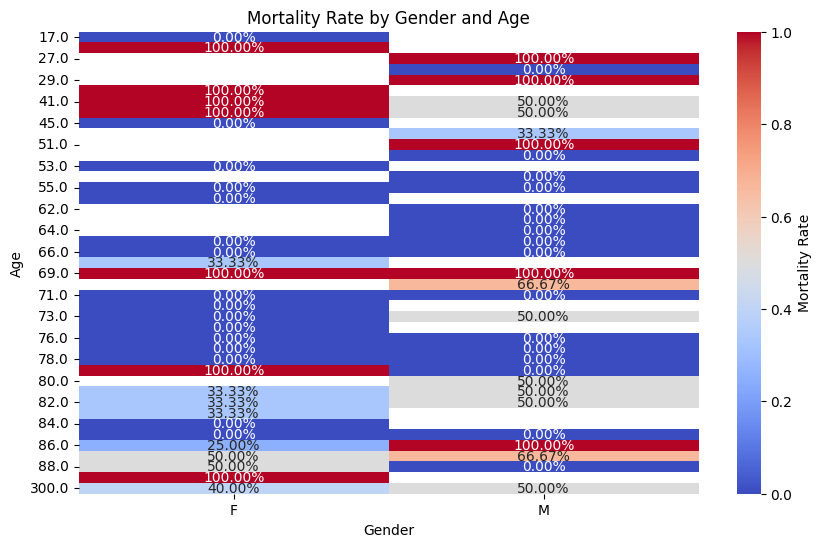

In [ ]:
# Correlation between each patient by gender and age

heatmap_data = mortality_rates.pivot_table(index='Age', columns='gender', values='mortality_rate')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2%", cbar_kws={'label': 'Mortality Rate'})
plt.title('Mortality Rate by Gender and Age')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

In [ ]:
# Calculate mortality rate for each patient by Age and ethnicity

mortality_rates = merged_df.groupby(['Age', 'ethnicity']).agg({'hospital_expire_flag': 'mean'}).reset_index()
mortality_rates.rename(columns={'hospital_expire_flag': 'mortality_rate'}, inplace=True)

print(mortality_rates)

      Age               ethnicity  mortality_rate
0    17.0                   WHITE             0.0
1    20.0                   OTHER             1.0
2    27.0   UNKNOWN/NOT SPECIFIED             1.0
3    28.0                   WHITE             0.0
4    29.0                   OTHER             1.0
..    ...                     ...             ...
61   88.0                   WHITE             0.4
62   89.0                   WHITE             1.0
63  300.0  BLACK/AFRICAN AMERICAN             0.5
64  300.0   UNKNOWN/NOT SPECIFIED             0.0
65  300.0                   WHITE             0.5

[66 rows x 3 columns]


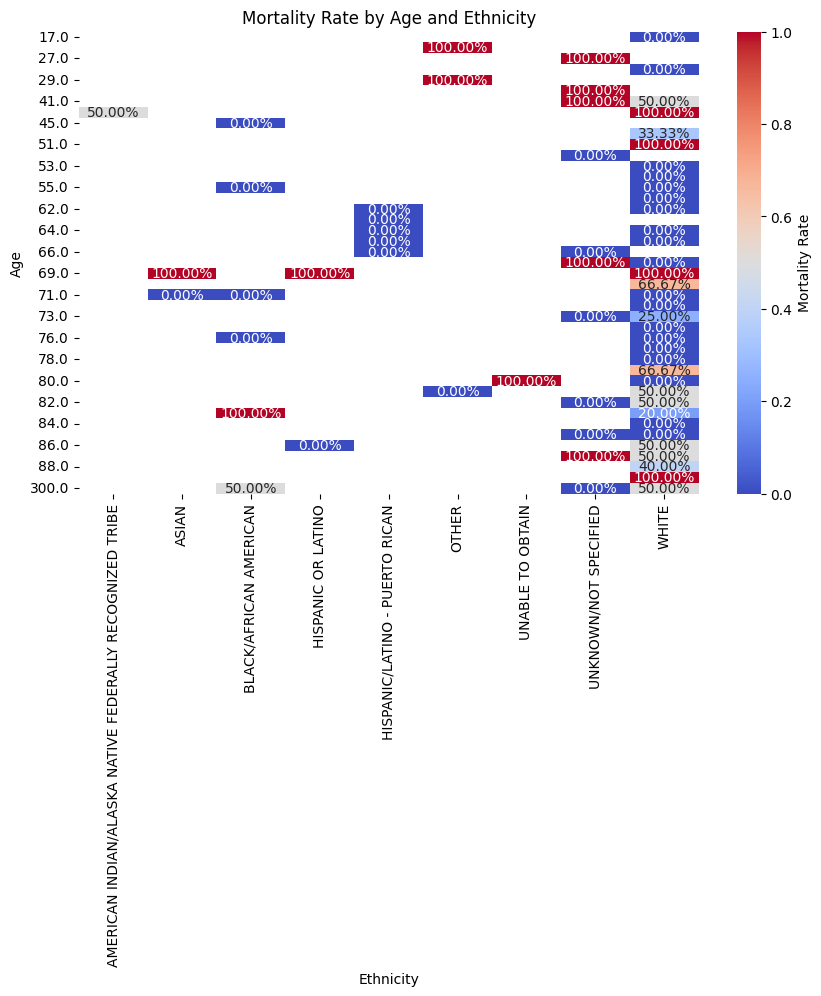

In [ ]:
# Correlation between each patient by Age and ethnicity

heatmap_data = mortality_rates.pivot_table(index='Age', columns='ethnicity', values='mortality_rate')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2%", cbar_kws={'label': 'Mortality Rate'})
plt.title('Mortality Rate by Age and Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Age')
plt.show()

In [ ]:
# Calculate mortality rate for each patient by Age and marital status

mortality_rates = merged_df.groupby(['Age', 'marital_status']).agg({'hospital_expire_flag': 'mean'}).reset_index()
mortality_rates.rename(columns={'hospital_expire_flag': 'mortality_rate'}, inplace=True)

print(mortality_rates)

      Age marital_status  mortality_rate
0    27.0         SINGLE        1.000000
1    28.0         SINGLE        0.000000
2    36.0         SINGLE        1.000000
3    41.0         SINGLE        0.500000
4    44.0        MARRIED        0.500000
..    ...            ...             ...
58   89.0       DIVORCED        1.000000
59   89.0        MARRIED        1.000000
60  300.0        MARRIED        0.666667
61  300.0         SINGLE        0.000000
62  300.0        WIDOWED        0.000000

[63 rows x 3 columns]


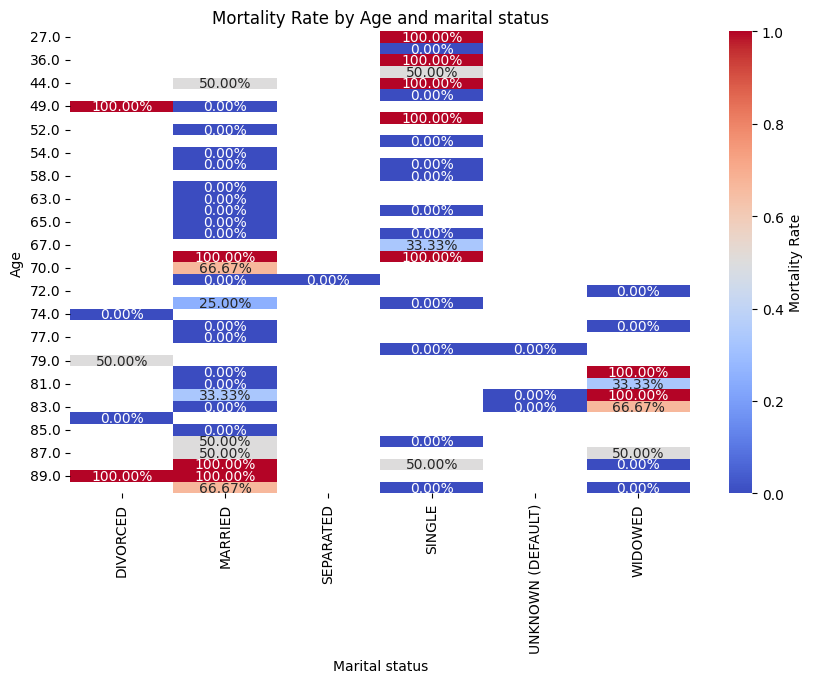

In [ ]:
# Correlation between each patient by Age and marital status

heatmap_data = mortality_rates.pivot_table(index='Age', columns='marital_status', values='mortality_rate')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2%", cbar_kws={'label': 'Mortality Rate'})
plt.title('Mortality Rate by Age and marital status')
plt.xlabel('Marital status')
plt.ylabel('Age')
plt.show()

#Univariate Analysis

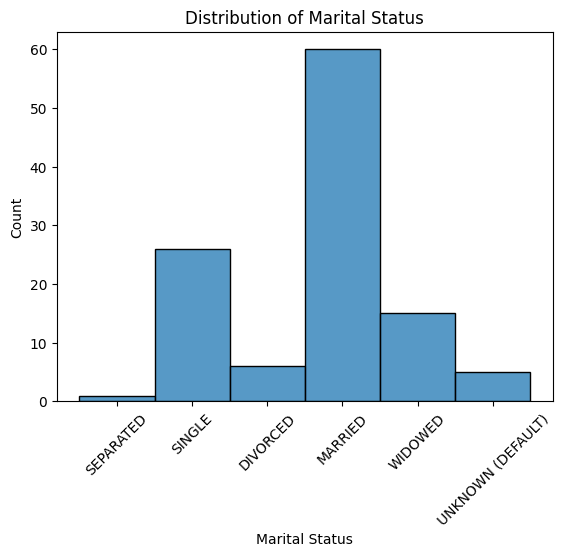

In [ ]:
# Create a histogram plot for 'marital_status' column
sns.histplot(data=df_admission, x='marital_status')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')

# Show plot
plt.show()

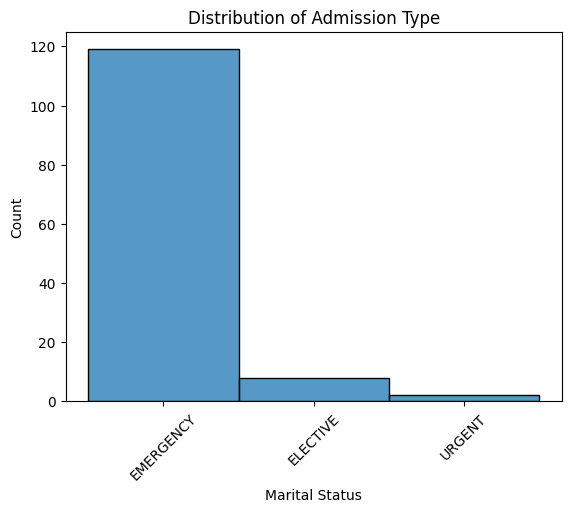

In [ ]:
# Create a histogram plot for 'admission_type' column
sns.histplot(data=df_admission, x='admission_type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Admission Type')

# Show plot
plt.show()

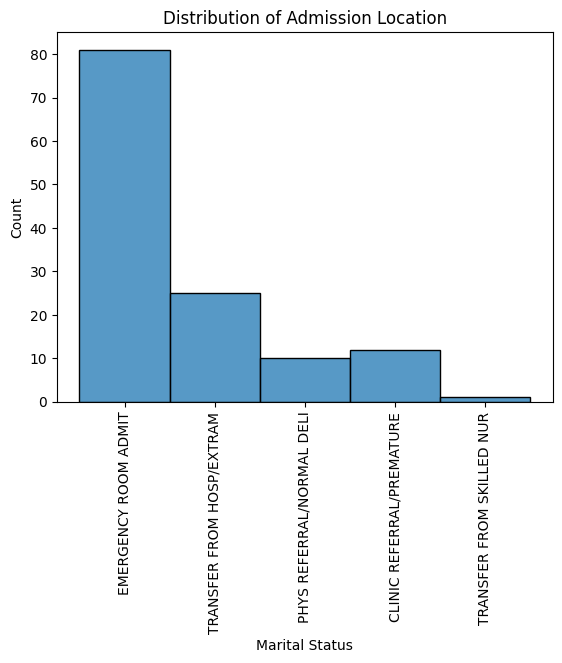

In [ ]:
# Create a histogram plot for 'admission_location' column
sns.histplot(data=df_admission, x='admission_location')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Admission Location')

# Show plot
plt.show()

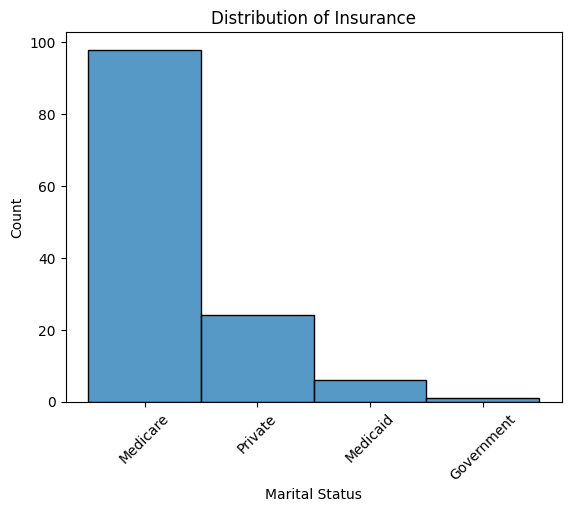

In [ ]:
# Create a histogram plot for 'insurance' column
sns.histplot(data=df_admission, x='insurance')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Insurance')

# Show plot
plt.show()

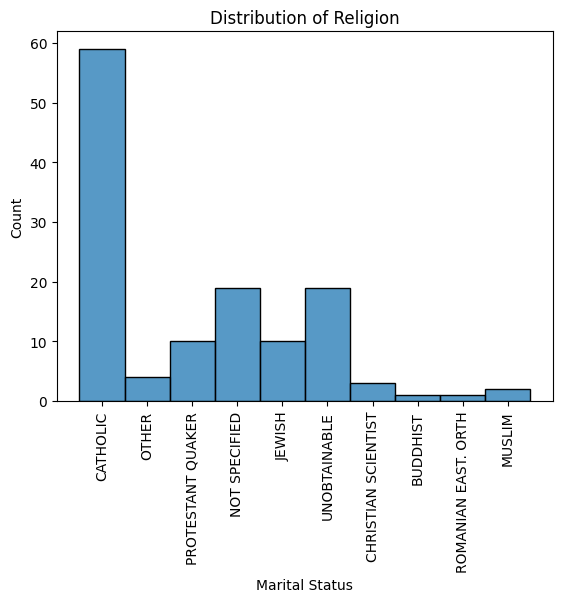

In [ ]:
# Create a histogram plot for 'religion' column
sns.histplot(data=df_admission, x='religion')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Religion')

# Show plot
plt.show()

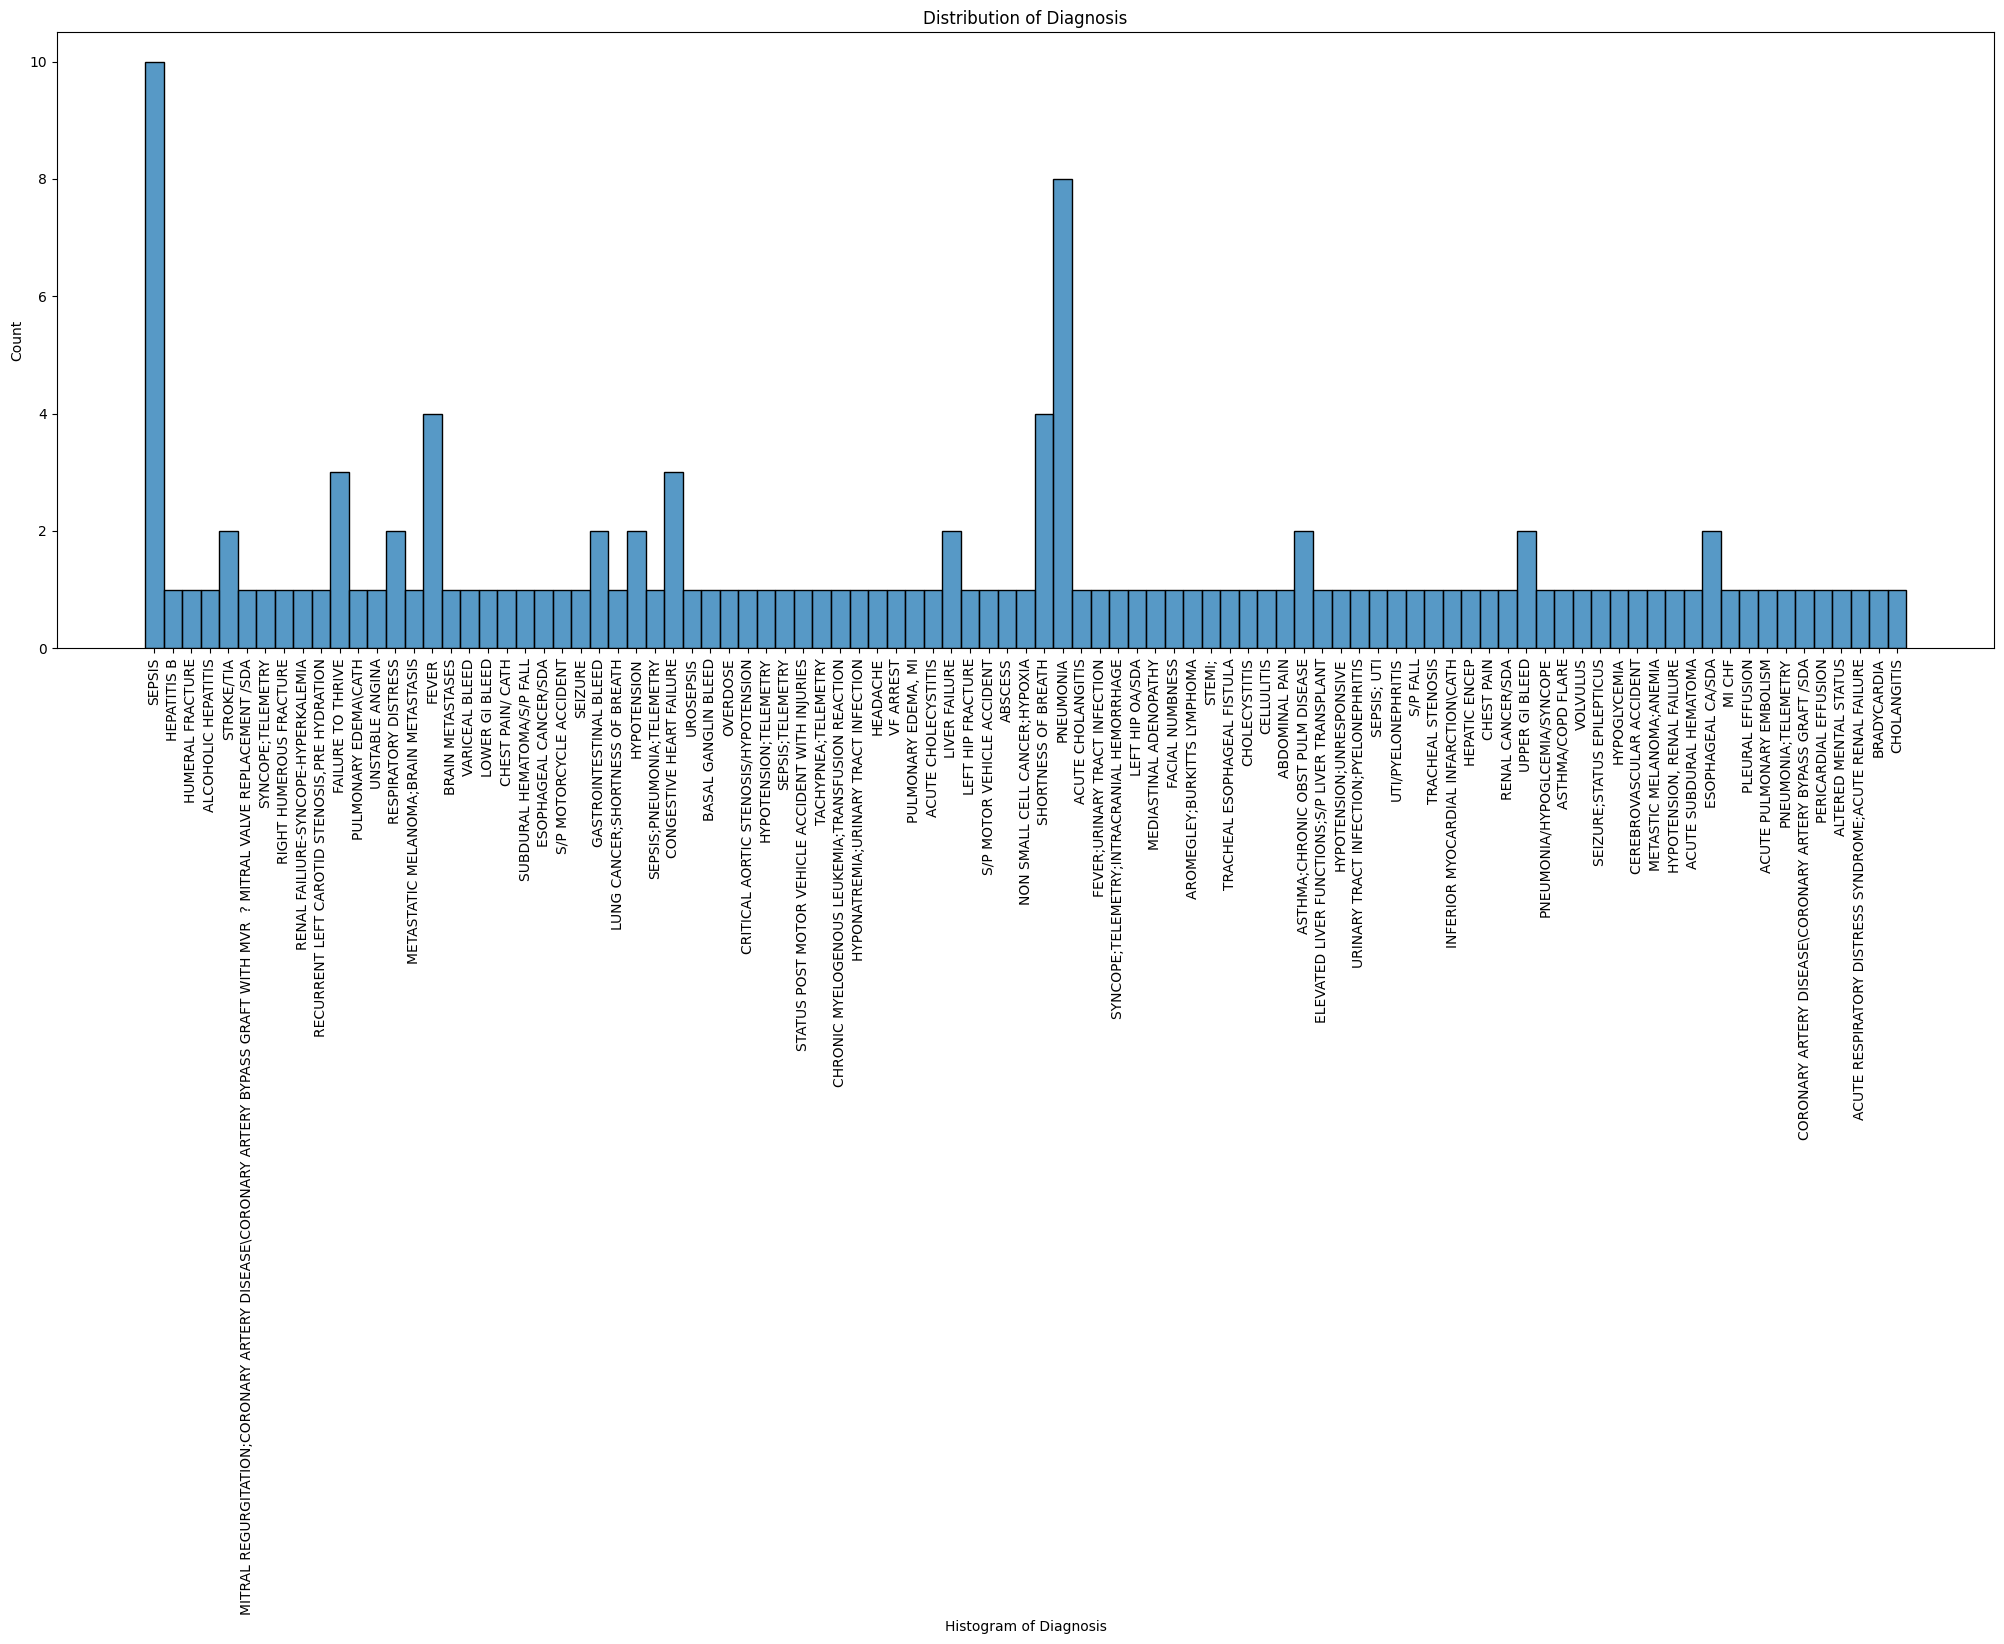

In [ ]:
plt.figure(figsize=(25, 8))

# Create a histogram plot for 'diagnosis' column
sns.histplot(data=df_admission, x='diagnosis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Histogram of Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis')

# Show plot
plt.show()


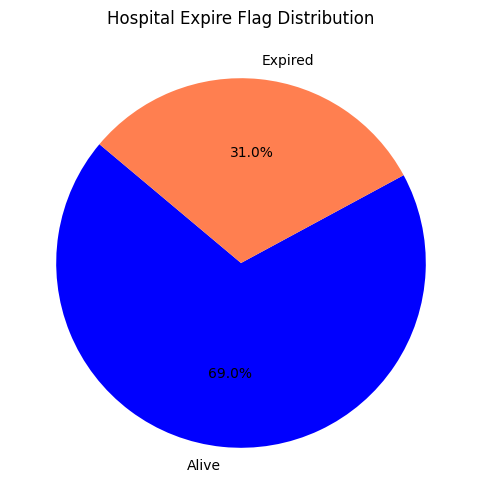

In [ ]:
# Count the occurrences of each value in 'hospital_expire_flag' column
hospital_expire_counts = df_admission['hospital_expire_flag'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Adjust the size of the figure as needed
hospital_expire_counts.plot.pie(autopct='%1.1f%%', colors=['blue', 'coral'], labels=['Alive', 'Expired'], startangle=140)
plt.title('Hospital Expire Flag Distribution')
plt.ylabel('')
plt.show()

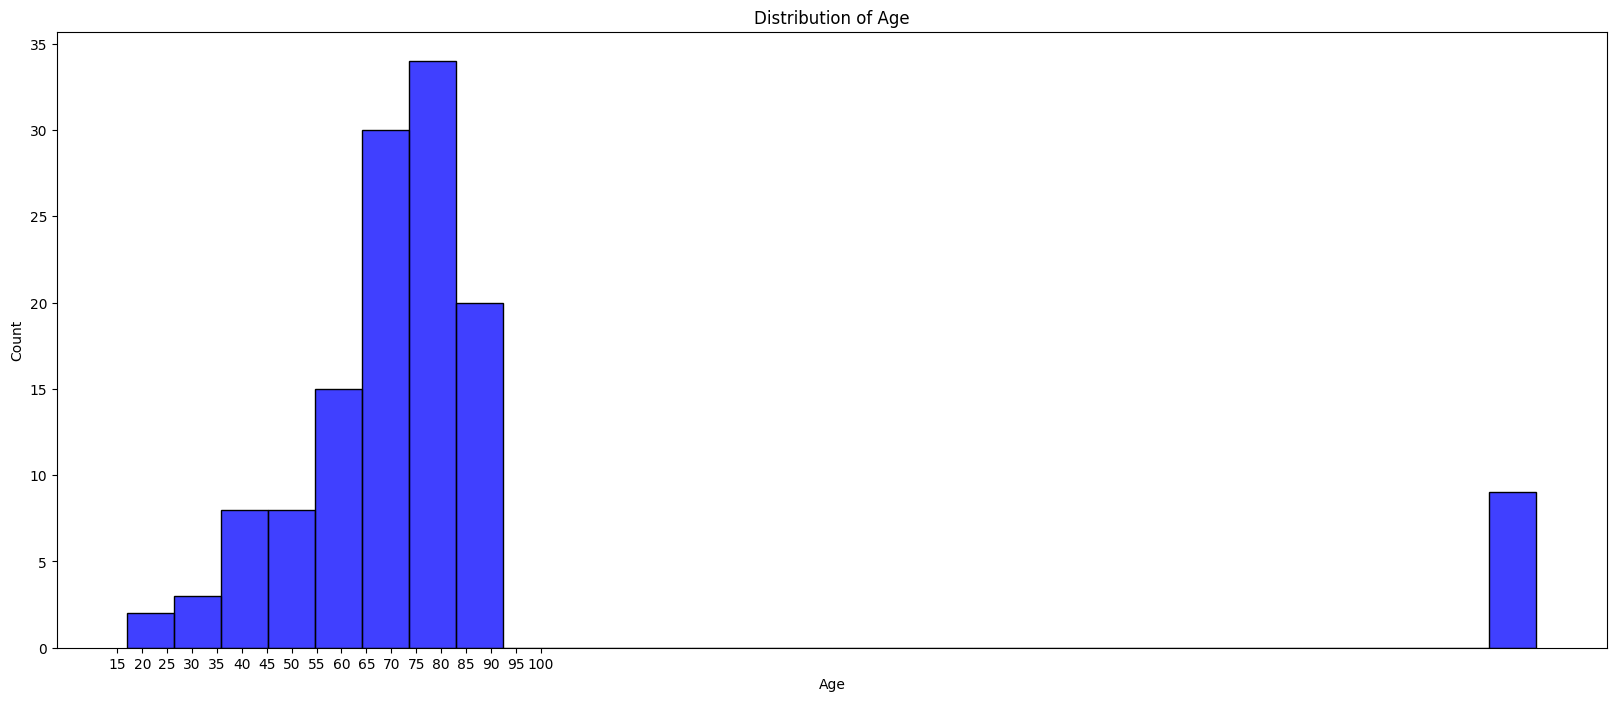

In [ ]:
# Create a histogram plot for 'Age'
start = 15
end = 101  # Add 1 to include the endpoint
step = 5
# Create the list using slicing
custom_ticks = list(range(start, end, step))
plt.figure(figsize=(20, 8))
sns.histplot(data=merged_df, x='Age', bins=30, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(custom_ticks)
plt.show()

#The outlier 300 represent the age more than 89 years.

## **Conclusion**

1. There are more married patients visiting the hospital.
2. There is a higher frequency of emergency admission types in the hospital.
3. There is a greater number of patients admitted through the emergency room in the hospital.
4. Patients are predominantly using Medicare insurance.
5. There are more Catholic patients visiting the hospital.
6. Sepsis, pneumonia, shortness of breath, and fever are the most prevalent health problems among the patients.
7. The hospital's mortality rate is 31%.
8. More patients are visiting the hospital within the age range of 65 to 85 years.




# **Recommendations**
1.	**Married Patients:** The hospital could consider offering support services tailored to the needs of married patients, such as family counselling, support groups, or resources for caregivers.
2.	**Emergency Admission Types:** To accommodate the higher frequency of emergency admissions, the hospital may need to ensure sufficient staffing and resources in the emergency department to provide timely and efficient care.
3.	**Emergency Room Admissions:** Improving the efficiency of emergency room processes, such as triage and patient flow management, can help reduce waiting times and enhance patient satisfaction.
4.	**Medicare Insurance Usage:** Given the prevalence of Medicare insurance usage, the hospital should ensure that staff are well-versed in Medicare billing and reimbursement procedures to optimize revenue and provide seamless billing experiences for patients.
5.	**Catholic Patients:** The hospital could explore opportunities for cultural competency training among staff to better understand and address the needs of Catholic patients, ensuring respectful and inclusive care delivery.
6.	**Prevalent Health Problems:** Developing specialized care programs or clinics focused on managing prevalent health problems like sepsis, pneumonia, shortness of breath, and fever can improve outcomes and patient satisfaction.
7.	**Mortality Rate:** Conducting thorough mortality reviews to identify factors contributing to mortality and implementing quality improvement initiatives targeted at reducing mortality rates, such as enhancing clinical protocols, staff training, and patient monitoring.
8.	**Age Range of Patients:** Tailoring healthcare services and facilities to meet the unique needs of elderly patients, including geriatric-focused care models, specialized clinics, and support services aimed at promoting healthy aging and improving quality of life. Additionally, investing in age-friendly infrastructure and amenities can enhance the hospital experience for older patients.
